In [1]:
#Import Statements
import pandas as pd
import numpy as np
from sklearn.metrics import  silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
#import pdb

In [3]:
#Loading the dataset
dataset = pd.read_csv('./Test_file.txt', sep= ' ', header= None)

In [4]:
#Normalising the data so that it lies in the range of [0-1]
def normalized(A):
    A = (A- np.min(A))/ (np.max(A) - np.min(A))
    return A

In [5]:
#Converting the data,a pandas dataframe, to n-dimensional numpy array
np_dataset = normalized(dataset).to_numpy(copy= True)
# np_dataset = (dataset).to_numpy(copy= True)
tsne = TSNE(n_components=2, verbose=1, perplexity=15, n_iter=300)
np_dataset = tsne.fit_transform(np_dataset)

[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.002s...
[t-SNE] Computed neighbors for 150 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.102844
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.798584
[t-SNE] KL divergence after 300 iterations: 0.290152


In [14]:
# Randomly choosing the K-centroids (in this case 3)  
initial_centroids = np_dataset[np.random.choice(np_dataset.shape[0], size = 3, replace= False)]

In [15]:
'''
Cluster Assignment Fuction
Parameters: 
        data : n-dimensional Numpy array
        Centroids : K-dimensional Numpy array 
        K: Default value is 3, splits the data in to k clusters
Returns the cluster assignment of each row

In this fuction for each row we calculate its distance from each of the centroids and assign it to the centroid which it is closest to
To calculate the distance i've used np.linalg.norm (which is same as Euclidian distance)  
'''
def Cluster_Assignment(data, centroids, k =3):
  cluster_assignments = np.empty(len(dataset))
  for i in range(len(data)):
    min_distance = np.Inf
    for cluster in range(k):
      distance = np.linalg.norm(data[i]-centroids[cluster])
      if distance < min_distance:
        min_distance = distance
        cluster_assignments[i] = cluster
  return cluster_assignments

In [16]:
'''
Move_Centroid Function:
  Parameters: 
        data : n-dimensional Numpy array
        Centroids : K-dimensional Numpy array 
        K: Default value is 3, splits the data in to k clusters
        Attributes: Number of Features in the dataset
        Instances: # rows in the dataset
        cluster_assignments : The current cluster assignment of each data point in the dataset.
  Take the average of the all datapoints in the cluster. This average will be new centroids.
  Returns the previous centroids and the current centroids  
'''
def Move_Centroid(centroids,attributes, instances, cluster_assignments, data, k=3):
  previous_centroids = centroids.copy()
  #current_centroids = np.empty(initial_centroids.shape)
  for cluster in range(k):
    for column in range(attributes):
      sum = 0.0
      count = 0.0
      average =None
      for row in range(instances):
        if(cluster == cluster_assignments[row]):
          sum += data[row, column]
          count+=1
          if count >0:
            average = sum/ count
        centroids[cluster, column] = average
  return previous_centroids, centroids

In [17]:
attributes = np_dataset.shape[1]
instances = len(dataset)
centroids_changed = False
current_centroids = np.empty(initial_centroids.shape)
previous_centroids = initial_centroids
# Randomly choosing the K-centroids (in this case 3) 
Initial_cluster_assignments = Cluster_Assignment(np_dataset, initial_centroids,3)
previous_cluster_assignment = Initial_cluster_assignments
new_cluster_assignment = np.empty(Initial_cluster_assignments.shape)
max_iterations = 100
score = 0.0
while max_iterations > 0 and (not(centroids_changed)):
  previous_centroids, current_centroids = Move_Centroid(initial_centroids,attributes, instances,Initial_cluster_assignments, np_dataset,3)
  centroids_changed = (np.array_equal(previous_centroids,current_centroids) and score> 0.25)
  new_cluster_assignment=Cluster_Assignment(np_dataset, current_centroids, k =3)
  score = silhouette_score(np_dataset, new_cluster_assignment)
  previous_cluster_assignment = new_cluster_assignment
  max_iterations -=1
  

In [18]:
print(current_centroids)

[[ 14.213359    -0.16338117]
 [ -8.535055    13.484301  ]
 [ -2.1453426  -13.505117  ]]


In [19]:
a_file = open("output.txt", "w")
for label in new_cluster_assignment:
    # np.savetxt(a_file, row)
    a_file.write(str(int(label))+"\n")

a_file.close()

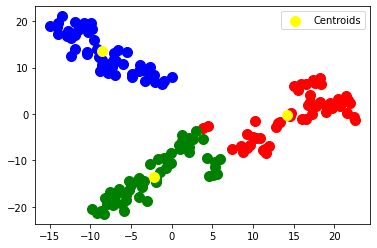

In [20]:
plt.scatter(np_dataset[ new_cluster_assignment== 0, 0], np_dataset[new_cluster_assignment == 0, 1], s = 100, c = 'red')
plt.scatter(np_dataset[new_cluster_assignment == 1, 0], np_dataset[new_cluster_assignment == 1, 1], s = 100, c = 'blue')
plt.scatter(np_dataset[new_cluster_assignment == 2, 0], np_dataset[new_cluster_assignment == 2, 1], s = 100, c = 'green')
plt.scatter(current_centroids[:, 0], current_centroids[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()